In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [48]:
img = cv2.imread("../temp/bounding/bounding_roi_1.png")


In [2]:
def show_img(img, txt):
    cv2.imshow(txt, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    pass

In [50]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    # print(im_data)
    # print(type(im_data))
    # print(im_data.shape)


    height, width  = im_data.shape[:2]
    
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')

    plt.show()
    pass

In [51]:
def show_inline(img, txt):
    cv2.imwrite(f"../temp/line_detect/line_{txt}.png", img)
    display(f"../temp/line_detect/line_{txt}.png")
    pass

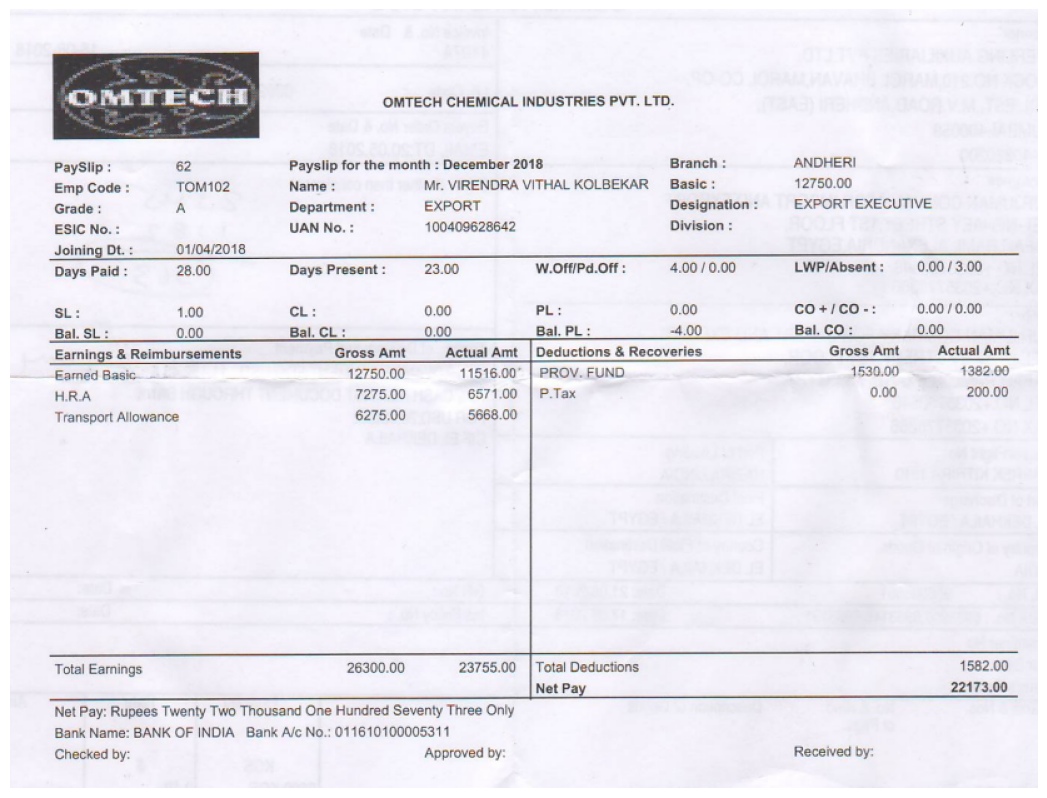

In [52]:
display("../Images/1.png")

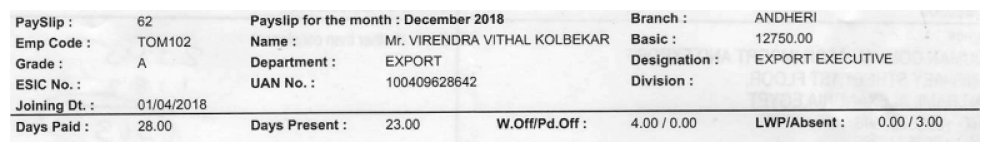

In [53]:
bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_inline(bw, "bw")
# cv2.imwrite("temp/line_detect/line_bw.png", bw)
# display("temp/line_detect/line_bw.png")

In [54]:
copy = img.copy()
edges = cv2.Canny(img,100, 200)
show_img(edges, "edges")

In [55]:
lines = cv2.HoughLinesP(edges, rho=1, theta=1*np.pi/180, threshold=100, minLineLength=100, maxLineGap=50)

In [56]:
for i in lines:
    x1,y1,x2,y2=i[0]
    print(f"x1: {x1} y1: {y1} \nx2: {x2}  y2: {y2}")
    # if (abs(x1-x2)<10) and abs(y1-y2)>50:
    cv2.line(copy, (x1,y1), (x2, y2), (255, 0, 0), 1)
show_img(copy, "lines")

x1: 369 y1: 82 
x2: 565  y2: 82
x1: 556 y1: 81 
x2: 770  y2: 81
x1: 386 y1: 80 
x2: 568  y2: 80
x1: 209 y1: 83 
x2: 381  y2: 83
x1: 389 y1: 89 
x2: 720  y2: 94
x1: 569 y1: 79 
x2: 770  y2: 79
x1: 193 y1: 96 
x2: 327  y2: 93
x1: 389 y1: 87 
x2: 745  y2: 93
x1: 192 y1: 8 
x2: 394  y2: 8
x1: 192 y1: 6 
x2: 394  y2: 6
x1: 300 y1: 27 
x2: 532  y2: 27
x1: 300 y1: 25 
x2: 525  y2: 21
x1: 389 y1: 88 
x2: 541  y2: 90
x1: 192 y1: 44 
x2: 343  y2: 41
x1: 167 y1: 82 
x2: 280  y2: 81
x1: 4 y1: 28 
x2: 228  y2: 28
x1: 4 y1: 25 
x2: 228  y2: 25
x1: 192 y1: 10 
x2: 394  y2: 10
x1: 300 y1: 26 
x2: 532  y2: 26
x1: 192 y1: 7 
x2: 394  y2: 7
x1: 391 y1: 94 
x2: 665  y2: 94
x1: 497 y1: 40 
x2: 705  y2: 40
x1: 5 y1: 97 
x2: 129  y2: 95
x1: 332 y1: 25 
x2: 532  y2: 22
x1: 5 y1: 92 
x2: 129  y2: 92
x1: 497 y1: 43 
x2: 705  y2: 43
x1: 505 y1: 39 
x2: 705  y2: 36
x1: 192 y1: 9 
x2: 394  y2: 9
x1: 497 y1: 41 
x2: 705  y2: 41
x1: 300 y1: 21 
x2: 462  y2: 19
x1: 192 y1: 12 
x2: 392  y2: 12
x1: 193 y1: 90 
x2: 327 

In [65]:
copy2 = img.copy()
# show_img(copy2, "copy")
for i in range(0, 300, 50):
    cv2.line(copy2, (i, 0), (i, 50), (0,0,255), 2)
    cv2.line(copy2, (i, 0), (i+50, 0), (0,255,0), 2)
    cv2.line(copy2, (i+50, 0), (i+50, 50), (0,0,255), 2)
    cv2.line(copy2, (i, 50), (i+50, 50), (255,0,0), 2)
    show_img(copy2, "lines")

In [6]:
import cv2
import numpy as np

# Load image
img = cv2.imread('../Images/1.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
show_img(edges, "edges")

# Perform Hough transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
# show_img(lines, "lines")

# Identify horizontal lines
horizontal_lines = []
for line in lines:
    rho, theta = line[0]
    if abs(theta - np.pi/2) < np.pi/18:  # check if the line is horizontal
        horizontal_lines.append(line)

# Draw the lines
for line in horizontal_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    if abs(x1-x2>10):
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
        print(f"x1: {x1}, y1: {y1}\nx2: {x2}, y2: {y2}")

# Display the result
cv2.imshow('Horizontal Lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
